# Colours project

In [1]:
from PIL import Image #Python Imaging Library

import sys

import os

import numpy as np

from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def RGB_histogram(values, name):
    '''
    RGB Histogram
    
    - Description:
        Creates an histogram for the frequency of RGB contributions in the image.
    
    - Parameters:
        values: the pixels RGB data as a list of tuples of length 3 (R, G and B)
        name: the name of the output image
    '''
    
    if not os.path.isdir("histograms"):
        os.makedirs("histograms")
        
    f = plt.figure(figsize=(15,10))
    plt.grid()
    color = ('firebrick','mediumseagreen','royalblue')
    for i,col in enumerate(color):
        plt.hist(np.array(values)[:,i], color = col, histtype = 'stepfilled', 
                     bins = 256, alpha = 0.6)
    plt.xlim([0,256])
    plt.title("RGB contributions for "+ name)
    plt.ylabel("Frequency")
    plt.xlabel("Contribution to the pixels")
    
    plt.savefig("histograms/RGB_contribution_" + name + ".png")

In [3]:
def multiple_images(images, outputname):
    '''
    Multiple Images
    
    - Description:
        Combines several images side by side.
    
    - Paramaters:
        images: images data
        outputname: output file name
    '''
    
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)
    
    new_im = Image.new('RGB', (total_width, max_height))
    
    x_offset = 0
    
    for im in images:
        new_im.paste(im, (x_offset,0))
        x_offset += im.size[0]
        new_im.save(outputname +'.jpg')

In [4]:
def RGB_image(values, outputname, img, size):
    '''
    RGB Image
    
    - Description:
        Creates a composite side by side of the image and its RGB contributions
        
    - Parameters:
        values: image RGB data as a list of tuples of length 3 (R, G, B)
        outputname: output file name
        img: image data
        size: image size (width and height)
    '''
    
    if not os.path.isdir("RGBcomposites"):
        os.makedirs("RGBcomposites")
        
    r = [(d[0], 0, 0) for d in values]
    g = [(0, d[1], 0) for d in values]
    b = [(0, 0, d[2]) for d in values]
    
    width, height = size
    
    new_im1 = Image.new('RGB', (width, height))
    new_im2 = Image.new('RGB', (width*3, height))
    x_offset = 0
    for j in [r, g, b]:
        new_im1.putdata(j)
        new_im2.paste(new_im1, (x_offset,0))
        x_offset = x_offset + width
        
    I = [img, new_im2]
    final = multiple_images(I, "RGBcomposites/" + outputname)
    return(final)

In [80]:
def colors_plot(colors, size, img, name, pixel_label):
    '''
    Palette plotter
    
    - Description: 
        Given certain RGB value or values, plots side by side an image, those RGB values and the image using the RGB values
        
    - Parameters:
        colors: list of RGB values to plot
        size: image size (width and height)
        img: image data
        name: name of the image
    '''
    
    if not os.path.isdir("ColorPalette"):
        os.makedirs("ColorPalette")
    
    # Making the sample colors
    sample = []
    number = len(colors)
    
    width, height = size
    
    for c in colors:
        sample = sample + ([c] * (round(width*height/number)-1))
        
    new_img = Image.new('RGB', (width, height))
    new_img.putdata(sample)
    
    # Making the image using the sample colors
    new_img2 = Image.new('RGB', (width, height))
    A = pixel_label.tolist()
    for i in range(0, len(A)):
        for j in range(0, len(Imagen.colors)):
            if A[i] == j:
                A[i] = Imagen.colors[j]
    new_img2.putdata(A)
    
    # Put everything together side by side
    images = [img, new_img, new_img2]
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)
    new_im = Image.new('RGB', (total_width, max_height))
    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset,0))
        x_offset += im.size[0]
        
    new_im.save('ColorPalette/ColorPalette_' + name +'.jpg')

In [6]:
def ElbowCurve(min_clusters, max_clusters, X):
    '''
    Elbow Curve
    
    - Description:
        Plots the score for different numbers of clusters, helping the user to determine the ideal cluster quantity
    
    - Parameters:
        min_clusters: minimum number of clusters to test
        max_clusters: maximum numbert of clusters to test
        X: the dataset
    
    '''
    Nc = range(min_clusters, max_clusters)
    kmeans = [KMeans(n_clusters=i) for i in Nc]
    score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
    plt.plot(Nc,score)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Curve')
    plt.show()

In [7]:
def ColorClusteringSKlearn(pixel_values, clusters):
    '''
    Color Clustering
    
    - Description:
        Using K-means clustering extracts from the image as many principals colors as clusters stated.
        Used random_state = 42
        Returns the centroids of the clusters and the label for each pixel (i.e., the value of the centroid for each pixel)
        
    - Parameters:
        pixel_values: image RGB data for every pixel
        clusters: number of desired clusters
    '''
    X = np.array(pixel_values)
    
    kmeans = KMeans(n_clusters=clusters, random_state=42).fit(X)
    
    centroids = kmeans.cluster_centers_
    centroids = np.around(centroids)
    centroids = centroids.astype(int)
    centroids = tuple(map(tuple, centroids))
    
    labels = kmeans.predict(X)
    
    return(centroids, labels)

In [81]:
class ImageAnalizer(object):
    
    def __init__(self, path):
        self.path = path
        self.name = path.split('/')[1].split(".", 1)[0]
        self.img = Image.open(path)
        self.pix = self.img.load()
        self.size = self.img.size
        self.total_pixels = self.size[0]*self.size[1]
        self.pixel_values = list(self.img.getdata())
        self.colors = np.NaN
        self.pixel_label = np.NaN
        
    def RGB_graph(self):
        return(RGB_histogram(self.pixel_values, self.name))
    
    def RGB_composite(self):
         return(RGB_image(self.pixel_values, 'RGB_composite_' + self.name, self.img, self.size))
        
    def Color_palette(self, num_clusters):
        self.colors, self.pixel_label = ColorClusteringSKlearn(self.pixel_values, num_clusters)
        return(colors_plot(self.colors, self.size, self.img, self.name, self.pixel_label))


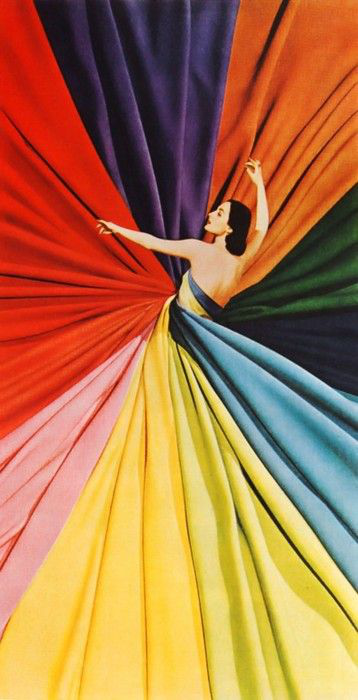

In [132]:
Imagen = ImageAnalizer("Imgs/res.jpg")
Imagen.img

In [133]:
Imagen.RGB_composite()

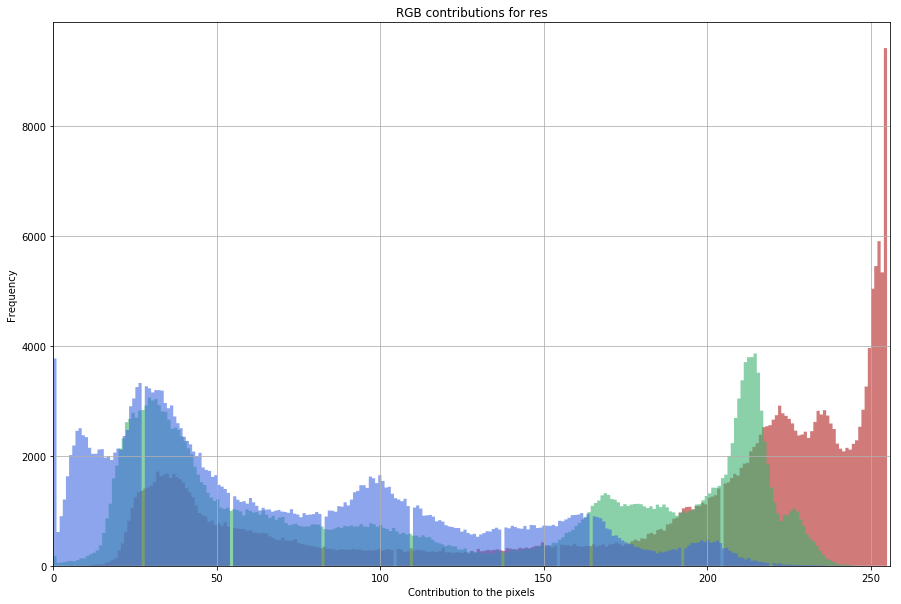

In [134]:
Imagen.RGB_graph()

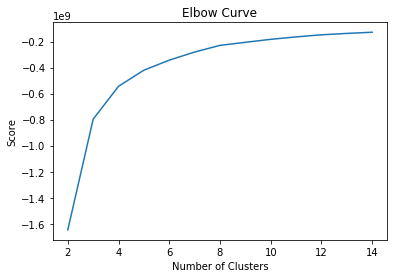

In [135]:
ElbowCurve(2, 15, Imagen.pixel_values)

In [137]:
X = 7
Imagen.Color_palette(X)